# Training IELTS Fluency Model
---
***Last Run 3 Jun 2023 6:49 PM***

This notebook are used to training **IELTS Fluency Model**. **IELTS Fluency Model** is a Deep Learning model that can classify english speech fluency. The model is build with TensorFlow [Keras](https://keras.io/getting_started/) API and training with custom dataset. 


The dataset that we use, we created directly which consists of 2807 audio files obtained from the YouTube audio of IELTS test participants. Audio has been categorized into 6 [CEFR](https://www.cambridgeenglish.org/exams-and-tests/cefr/) classes (A1, A2, B1, B2, C1, C2).

The layers to build the classification model is 3 LSTM, 3 Dropout, and 1 Dense layer for classification. The training process that is carried out is the same as the training process for deep learning models in general.

In this notebook there are several process to train model.

1.   Preprocessing.
2.   Training.
3.   Evaluate and predict.
4.   Tensorboard.
5.   Save model.
6.   Load model.



To train model, there are several library to use in this process. Required library:

1.   OS.
2.   Pandas.
3.   Numpy.
4.   Matplotlib.
5.   Scikit-Learn.
6.   TensorFlow GPU.
7.   Datetime.
8.   Time.
9.   Tensorboard.
10.  Librosa.
11.  Scikitplot.
12.  IPython.
13.  Seaborn.
14.  Pydub.
15.  IO.
16.  Urllib.

This notebook are save in [Colab](https://colab.research.google.com/drive/1qVoHicefc2slVEleaTeFHzlEX9ghPxNe?usp=sharing) or [Github](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Fluency). The models result are save in [Drive](https://drive.google.com/drive/folders/1usbt50NY36Pm-svLObmkno74qsx-3MDE?usp=share_link) or [OneDrive](https://telkomuniversityofficial.sharepoint.com/:f:/s/TAPurwokerto/EmqMEktv2pBKp9bTZMn6oeYB17iuN3Ml7xk7PZVXLlgFog?e=GdXK504)

---
For comparison of model results, we carry out the training process with various types of datasets that we have created but still use the same model architecture.

In this experiment, we use a pre-selected truncated with error dataset.

In [1]:
# Define global variable
TITLE = '"IELTS Fluency Model"'
DESCRIPTION = '"Training IELTS Fluency Model with Keras LSTM Real Error Cut Dataset"'
MODEL_NAME = "IELTS_Fluency_Model_Real_Error_Cut_Dataset"
MODEL_SUMMARY = "Summary_" + MODEL_NAME + ".txt"

PNG = ".png"

REAL_COUNT = '"Real Dataset"'
ERROR_COUNT = '"Error Dataset"'
REAL_CSV = "dataset.csv"
ERROR_CSV = "dataset_er.csv"
A1_SAMPLE = "A1.png"
A2_SAMPLE = "A2.png"
B1_SAMPLE = "B1.png"
B2_SAMPLE = "B2.png"
C1_SAMPLE = "C1.png"
C2_SAMPLE = "C2.png"
REAL_NUMPY_DATASET = "dataset_real.npy"
ERROR_NUMPY_DATASET = "dataset_er.npy"
MERGE_DATASET = '"Merge Dataset"'
FINAL_DATASET = '"Final Dataset"'

COLAB_BASE_PATH = "/content/"
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Fluency/Model/"Real Error Cut"'''

MODEL_EVALUATION = '"Model Evaluation"'
LOSS_EVALUATION = '"Loss Evaluation"'
ACCURACY_EVALUATION = '"Accuracy Evaluation"'
CM_EVALUATION = '"Confusion Matrix Evaluation"'
CR_EVALUATION = '"Classification Report Evaluation"'
TRAINING_TIME = '"Training Time"'

MODEL_EVALUATION_PNG = "Model Evaluation.png"
LOSS_EVALUATION_PNG = "Loss Evaluation.png"
ACCURACY_EVALUATION_PNG = "Accuracy Evaluation.png"
CM_EVALUATION_PNG = "Confusion Matrix Evaluation.png"
CR_EVALUATION_PNG = "Classification Report Evaluation.png"
TRAINING_TIME_PNG = "Training Time.png"

H5_MODEL_NAME = "ielts_fluency_model.h5"
FOLDER_MODEL_NAME = "ielts_fluency_model"

TENSORBOARD_LOG = "logs-training"

## Preprocessing 🆗

### Collect dataset ✅

#### Github ⛔️

In [ ]:
# Clone dataset
!git clone https://github.com/hafidikhsan/fluency-cefr-dataset.git

In [ ]:
# Open clone dataset folder
%cd fluency-cefr-dataset

In [ ]:
# Unzip data
!unzip "With Error.zip"

In [ ]:
# Back to root folder
%cd ..

In [ ]:
# Make new dataset folder
!mkdir dataset

In [ ]:
# Go to dataset folder
%cd dataset

In [ ]:
# Make new error folder in dataset folder
!mkdir Error

In [ ]:
# Back to root path
%cd ..

In [ ]:
# Copy clone dataset to dataset folder
!cp -r /content/fluency-cefr-dataset/"With Error"/A1 /content/dataset
!cp -r /content/fluency-cefr-dataset/"With Error"/A2 /content/dataset
!cp -r /content/fluency-cefr-dataset/"With Error"/B1 /content/dataset
!cp -r /content/fluency-cefr-dataset/"With Error"/B2 /content/dataset
!cp -r /content/fluency-cefr-dataset/"With Error"/C1 /content/dataset
!cp -r /content/fluency-cefr-dataset/"With Error"/C2 /content/dataset

In [ ]:
# Copy error dataset to dataset error folder
!cp -r /content/fluency-cefr-dataset/"With Error"/Error/A1 /content/dataset/Error
!cp -r /content/fluency-cefr-dataset/"With Error"/Error/A2 /content/dataset/Error
!cp -r /content/fluency-cefr-dataset/"With Error"/Error/B1 /content/dataset/Error
!cp -r /content/fluency-cefr-dataset/"With Error"/Error/B2 /content/dataset/Error

#### Drive ✅

In [2]:
# Drive Access
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


##### Make dir 🟢

In [3]:
# Make new dataset folder
!mkdir dataset

##### Clean 🔵

In [4]:
# Copy dataset
!cp -r /content/drive/MyDrive/"Final Project"/"Machine Learning"/Fluency/Dataset/"With Error.zip" /content/

In [5]:
# Unzip data
!unzip "With Error.zip"

Streaming output truncated to the last 5000 lines.
  inflating: With Error/B2/IELTS Speaking Band 5.5 Mock Test with Feedback [RlwxOzi29FU][36]-TRIM.mp3  
  inflating: __MACOSX/With Error/B2/._IELTS Speaking Band 5.5 Mock Test with Feedback [RlwxOzi29FU][36]-TRIM.mp3  
  inflating: With Error/B2/IBM IELTS SPEAKING TEST BAND 5 5 [bWI5cdhSOMw]9n43to9n53-TRIM.mp3  
  inflating: __MACOSX/With Error/B2/._IBM IELTS SPEAKING TEST BAND 5 5 [bWI5cdhSOMw]9n43to9n53-TRIM.mp3  
  inflating: With Error/B2/IELTS Speaking Test band score 6 with feedback 2023 [aI0JX2qc870]5:41to5:49-TRIM.mp3  
  inflating: __MACOSX/With Error/B2/._IELTS Speaking Test band score 6 with feedback 2023 [aI0JX2qc870]5:41to5:49-TRIM.mp3  
  inflating: With Error/B2/IELTS Speaking Interview ｜ Band 6 ｜ Real Exam! [mZF0irCXLTQ][32]-TRIM.mp3  
  inflating: __MACOSX/With Error/B2/._IELTS Speaking Interview ｜ Band 6 ｜ Real Exam! [mZF0irCXLTQ][32]-TRIM.mp3  
  inflating: With Error/B2/IELTS Speaking Test band score 6.5 with feedba

In [6]:
# Go to dataset folder
%cd dataset

/content/dataset


In [7]:
# Make error folder in dataset folder
!mkdir Error

In [8]:
# Go to root folder
%cd ..

/content


In [9]:
# Copy clone dataset to dataset folder
!cp -r /content/"With Error"/A1 /content/dataset
!cp -r /content/"With Error"/A2 /content/dataset
!cp -r /content/"With Error"/B1 /content/dataset
!cp -r /content/"With Error"/B2 /content/dataset
!cp -r /content/"With Error"/C1 /content/dataset
!cp -r /content/"With Error"/C2 /content/dataset

In [10]:
# Copy error dataset to dataset error folder
!cp -r /content/"With Error"/Error/A1 /content/dataset/Error
!cp -r /content/"With Error"/Error/A2 /content/dataset/Error
!cp -r /content/"With Error"/Error/B1 /content/dataset/Error
!cp -r /content/"With Error"/Error/B2 /content/dataset/Error

##### All 🔵

In [ ]:
# Copy dataset
!cp -r /content/drive/MyDrive/"Final Project"/"Machine Learning"/Fluency/Dataset/"All.zip" /content/

In [ ]:
# Unzip data
!unzip "All.zip"

In [ ]:
# Copy clone dataset to dataset folder
!cp -r /content/All/A1 /content/dataset
!cp -r /content/All/A2 /content/dataset
!cp -r /content/All/B1 /content/dataset
!cp -r /content/All/B2 /content/dataset
!cp -r /content/All/C1 /content/dataset
!cp -r /content/All/C2 /content/dataset

### Import library ✅

In [11]:
# Import library
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

### Define variable and function ✅

In [13]:
# Define variabel
n_mfcc = 30
parent_dir = "dataset/"
error_dir = "dataset/Error"

In [14]:
# Define function for feature extraction
def feature_extraction(file_name):
    X, sample_rate = librosa.load(file_name)

    if X.ndim > 1:
        X = X[:, 0]
    X = X.T
            
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_mfcc).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=X).T, axis=0)
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0)

    return mfccs, rmse, spectral_flux, zcr

In [15]:
# Define function to parsing audio
def parse_audio_files(sub_dirs, parent_dir):
    number_of_features = 5 + n_mfcc
    dataset = np.empty((0, number_of_features))
    
    for sub_dir in sub_dirs:
        for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
            print("Actual File Name: ", file_name.path)
            try:
                mfccs, rmse, spectral_flux, zcr = feature_extraction(file_name.path)
            except Exception as e:
                print("[Error] there was an error in feature extraction. %s" % (e))
                continue
             
            extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr, sub_dir, file_name.path])
            dataset = np.vstack([dataset, extracted_features])
        print("Extracted features from %s, done" % (sub_dir))
        
    return np.array(dataset)

In [16]:
# Define function to get numpy
def folder_to_dataframe(sub_dirs, parent_dir):
    folders = np.empty((0, 2))
    for sub_dir in sub_dirs:
          for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
              folder_path = np.hstack([file_name.path, sub_dir])
              folders = np.vstack([folders, folder_path])
    
    return np.array(folders)

In [17]:
# Define function to display dataset
def display_data(file_name, clas):
    X, sample_rate = librosa.load(file_name)

    S = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128, fmax=8000)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_mfcc)

    fig, ax = plt.subplots(nrows=3, constrained_layout=True, figsize=[7, 10])

    librosa.display.waveshow(X, sr=sample_rate, ax=ax[0])
    ax[0].set(title="Waveform")

    img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                                  x_axis="time", y_axis="mel", fmax=8000,
                                  ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    ax[1].set(title="Mel spectrogram")

    img = librosa.display.specshow(mfccs, x_axis="time", ax=ax[2])
    fig.colorbar(img, ax=[ax[2]])
    ax[2].set(title="MFCC")

    display.display(display.Audio(np.transpose(X), rate=sample_rate))
    
    fig.suptitle(clas, fontsize=16)

    fig.savefig(f"{clas}.png", dpi=300.0) 

In [18]:
# Define function to plot training process
def show_graph(train, val, metric, filename):
    plt.plot(train)
    plt.plot(val)
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")
    
    plt.show()
    
    plt.savefig(filename, dpi=300.0, transparent=True)

In [19]:
# Define function for display length dataset
def vis_data(df, title):
    plt_title = title
    category_count = df["Class"].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=category_count.index, y=category_count)

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25), 
                    size=13, 
                    color="black" , 
                    ha="center", 
                    va="center", 
                    textcoords="offset points", 
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )
    
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

In [20]:
# Define function for display length dataset
def vis_data_encode(df, title):
    plt_title = title
    category_count = df[33].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=category_count.index, y=category_count)

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25), 
                    size=13, 
                    color="black" , 
                    ha="center", 
                    va="center", 
                    textcoords="offset points", 
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )
    
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

In [21]:
# Define timer function
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

### Define directories dataset ✅

#### Clean 🔵

In [22]:
# Define real audio path
audio_subdirectories_real = os.listdir(parent_dir)
audio_subdirectories_real.sort()
audio_subdirectories_real.remove("Error")
print("Real Audio Subdirs:", audio_subdirectories_real)

Real Audio Subdirs: ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']


In [23]:
# Define error audio path
audio_subdirectories_er = os.listdir(error_dir)
audio_subdirectories_er.sort()
print("Error Audio Subdirs:", audio_subdirectories_er)

Error Audio Subdirs: ['A1', 'A2', 'B1', 'B2']


#### All 🔵

In [ ]:
# Define real audio path
audio_subdirectories_real = os.listdir(parent_dir)
audio_subdirectories_real.sort()
print("Real Audio Subdirs:", audio_subdirectories_real)

### Parsing dataset to dataframe ✅

In [24]:
# Define column name
columns = ["Path", "Class"]

#### Real 🟠

In [25]:
# Parsing file path real to numpy
folders_real = folder_to_dataframe(audio_subdirectories_real, parent_dir)

In [26]:
# Display dataframe path real
df_folder_real = pd.DataFrame(folders_real, columns=columns)
df_folder_real.head()

Path  \
0                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]4n22to4n32-TRIM.mp3   
1  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]9n28to9n35-TRIM.mp3   
2                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]6n50to7n00-TRIM.mp3   
3                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]2n07to2n14-TRIM.mp3   
4          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]5n14to5n24-TRIM.mp3   

  Class  
0    A1  
1    A1  
2    A1  
3    A1  
4    A1

In [27]:
# Display path real dataframe info
df_folder_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    2591 non-null   object
 1   Class   2591 non-null   object
dtypes: object(2)
memory usage: 40.6+ KB


#### Error 🟠

In [28]:
# Parsing file path error to numpy
folders_er = folder_to_dataframe(audio_subdirectories_er, error_dir)

In [29]:
# Display dataframe path error
df_folder_er = pd.DataFrame(folders_er, columns=columns)
df_folder_er.head()

Path  \
0  dataset/Error/A1/2023 IELTS Speaking test band score 4 ｜ Nervous candidate [bGlQDqwIadE]1n55to2n05-TRIM.mp3   
1         dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]12n18to12n27-TRIM.mp3   
2                 dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][53]-TRIM.mp3   
3              dataset/Error/A1/IELTS Speaking Score 4 Why Test-takers Lose Points!？ [_YcuhmYuMGc][9]-TRIM.mp3   
4           dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3   

  Class  
0    A1  
1    A1  
2    A1  
3    A1  
4    A1

In [30]:
# # Display path error dataframe info
df_folder_er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    216 non-null    object
 1   Class   216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


### Visualization ✅

#### Real 🟠

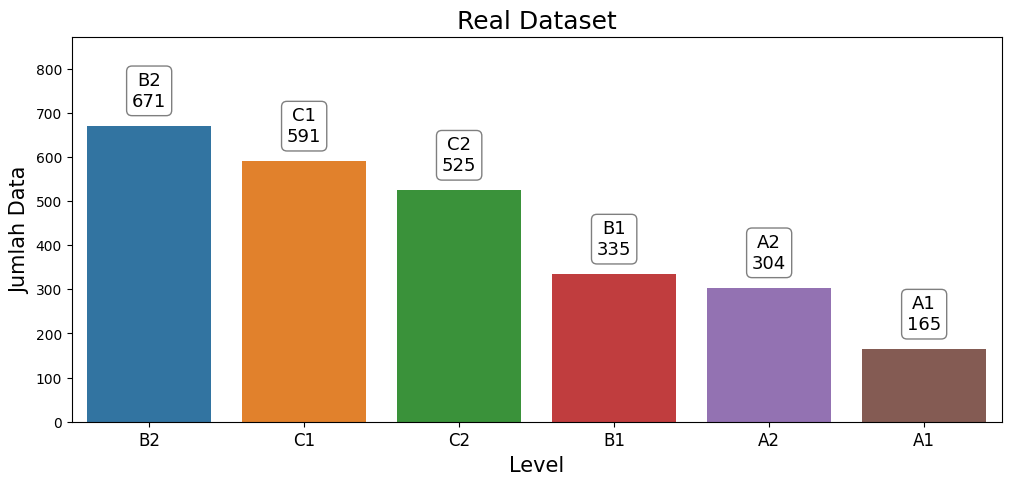

In [31]:
# Visualize real dataset
vis_data(df_folder_real, "Real Dataset")

#### Error 🟠

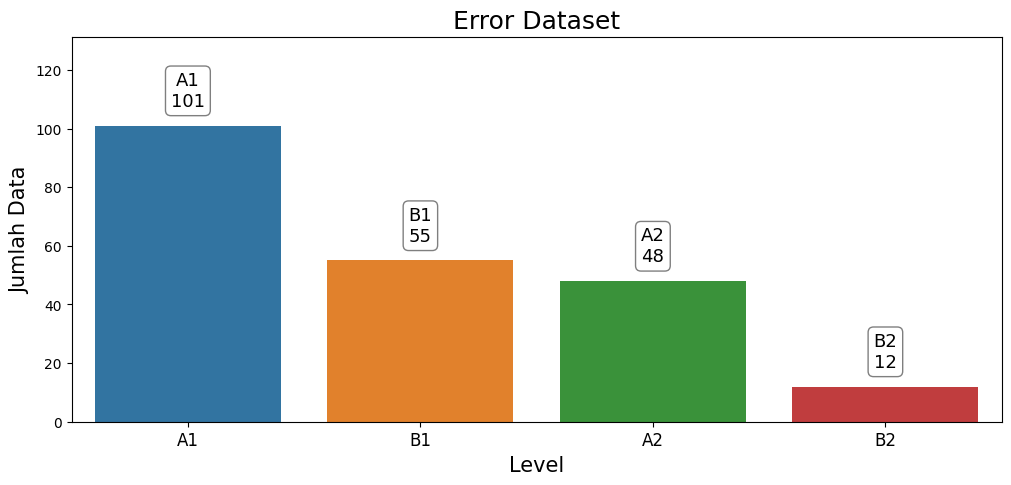

In [32]:
# Visualize error dataset
vis_data(df_folder_er, "Error Dataset")

### Generate cvs ✅

#### Real 🟠

In [33]:
# Generate CSV
df_folder_real.to_csv(REAL_CSV)

#### Error 🟠

In [34]:
# Generate CSV
df_folder_er.to_csv(ERROR_CSV)

### Grouping ✅

In [35]:
# Grouping dataset
df_group = df_folder_real.groupby("Class")
df_group.first()

Path
Class                                                                                                 
A1                                   dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]4n22to4n32-TRIM.mp3
A2     dataset/A2/IELTS Speaking Test band score 4 with feedback 2022 [qLf6L-Y27M0]5n55to6n05-TRIM.mp3
B1              dataset/B1/IELTS Speaking Test Band score 4.5 with feedback [4UQTBp0ZWZM][13]-TRIM.mp3
B2              dataset/B2/IELTS Speaking Test band 6.5 with feedback [e5GWrUr_e4c]4:29to4:36-TRIM.mp3
C1          dataset/C1/IELTS Speaking Test band 7.0 with feedback 2022 [QLy_H4JDVQA]1:3to1:10-TRIM.mp3
C2                dataset/C2/IELTS Speaking Interview ｜ BAND 9 ｜ Real Test! [fhPqkCQwygM][32]-TRIM.mp3

### Display random data ✅

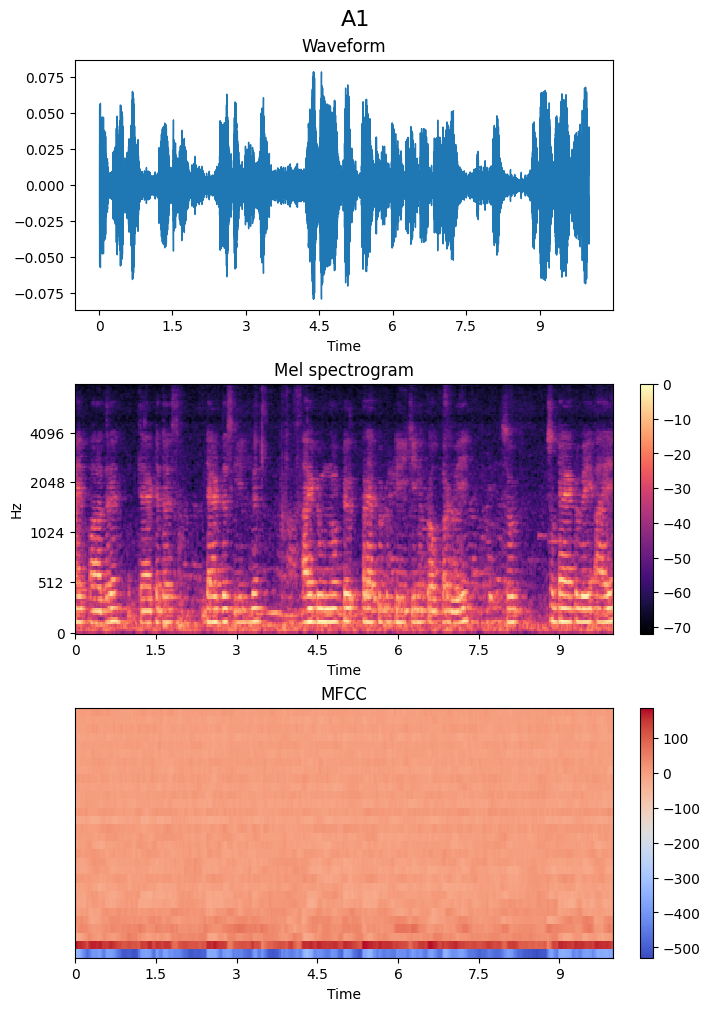

In [36]:
# Display data class "A1"
df_a1 = df_group.get_group("A1").sample()
display_data(df_a1.iloc[0]["Path"], df_a1.iloc[0]["Class"])

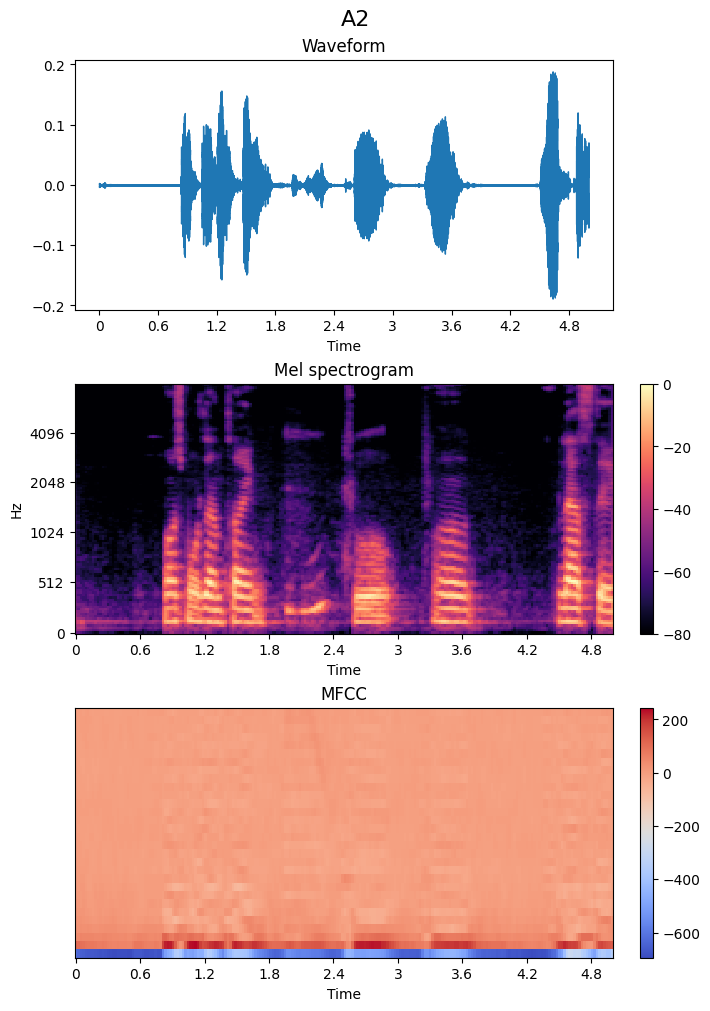

In [37]:
# Display data class "A2"
df_a2 = df_group.get_group("A2").sample()
display_data(df_a2.iloc[0]["Path"], df_a2.iloc[0]["Class"])

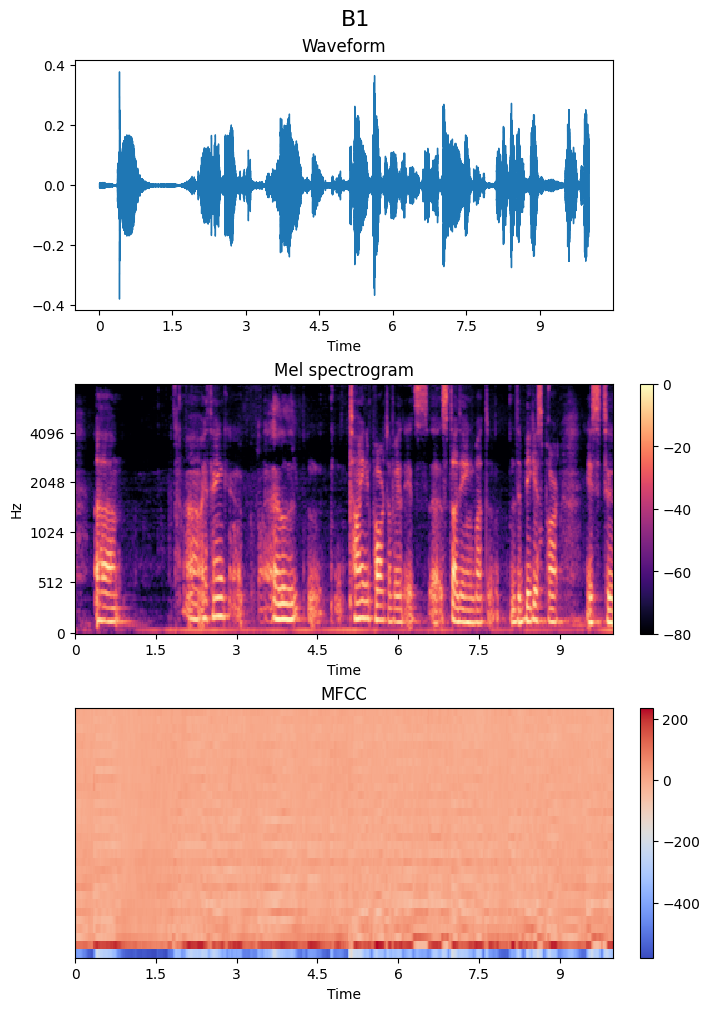

In [38]:
# Display data class "B1"
df_b1 = df_group.get_group("B1").sample()
display_data(df_b1.iloc[0]["Path"], df_b1.iloc[0]["Class"])

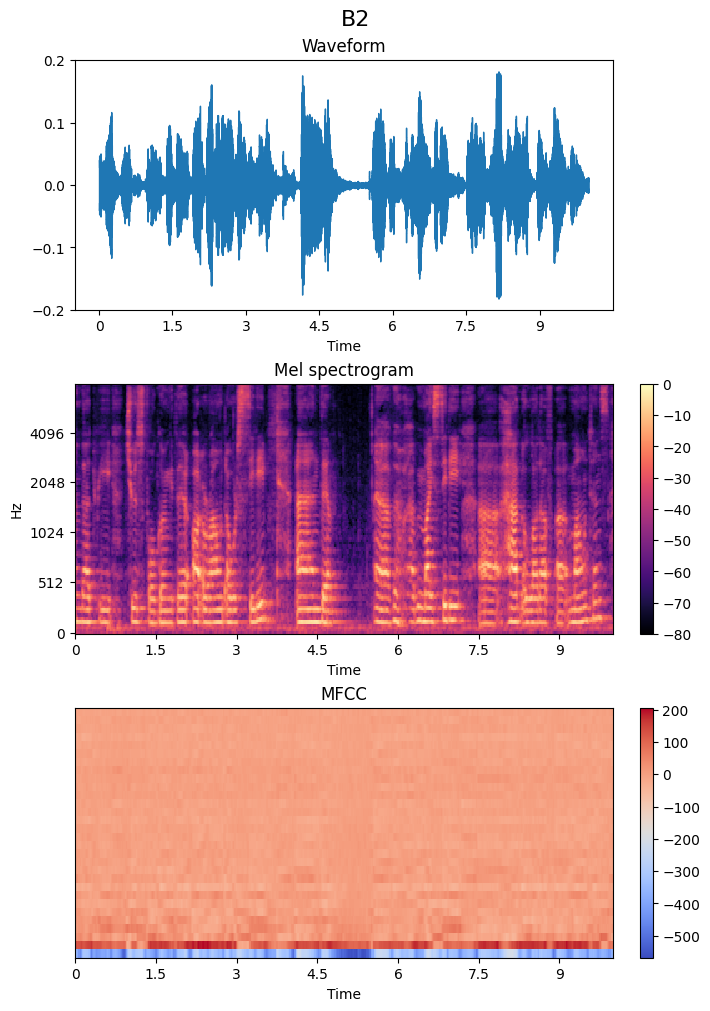

In [39]:
# Display data class "B2"
df_b2 = df_group.get_group("B2").sample()
display_data(df_b2.iloc[0]["Path"], df_b2.iloc[0]["Class"])

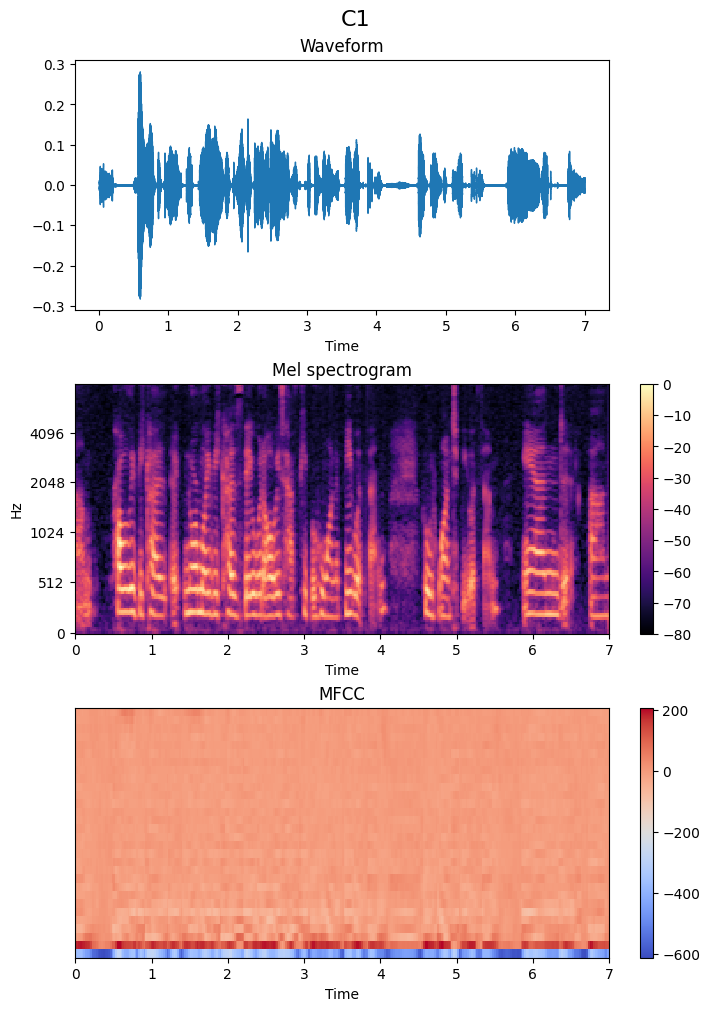

In [40]:
# Display data class "C1"
df_c1 = df_group.get_group("C1").sample()
display_data(df_c1.iloc[0]["Path"], df_c1.iloc[0]["Class"])

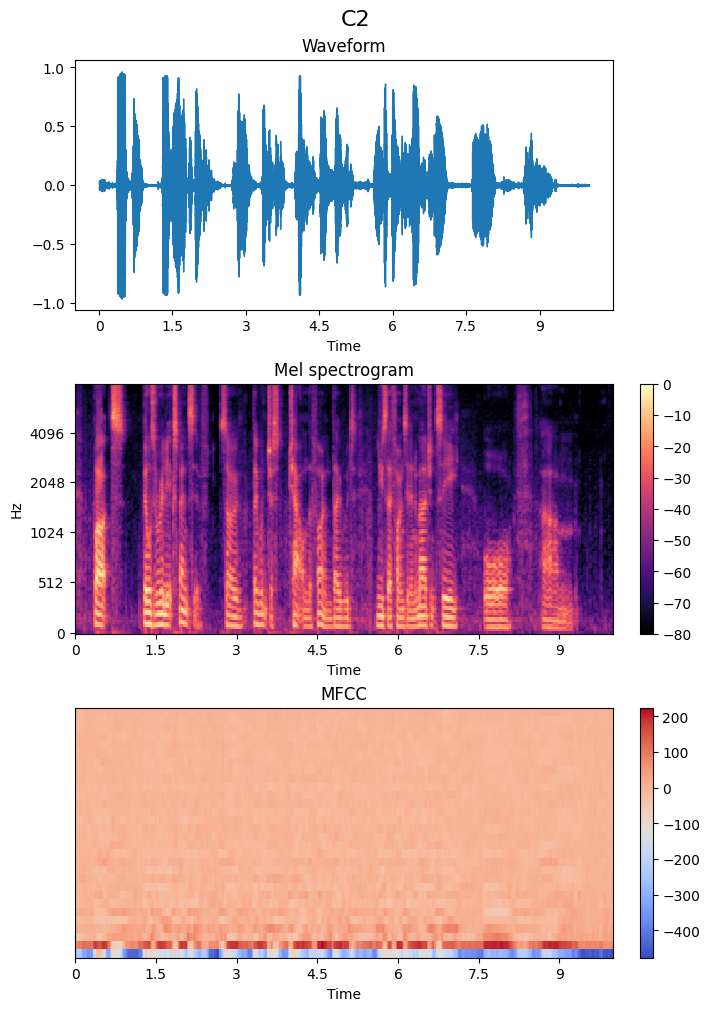

In [41]:
# Display data class "C2"
df_c2 = df_group.get_group("C2").sample()
display_data(df_c2.iloc[0]["Path"], df_c2.iloc[0]["Class"])

### Parsing data to MFCC ✅

#### Real 🟠

In [42]:
# Parsing audio to get numpy
dataset_real = parse_audio_files(audio_subdirectories_real, parent_dir)

Actual File Name:  dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]4n22to4n32-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]9n28to9n35-TRIM.mp3
Actual File Name:  dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]6n50to7n00-TRIM.mp3
Actual File Name:  dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]2n07to2n14-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]5n14to5n24-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]6n08to6n14-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]10n46to10n51-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking test band score 2.5, 2022 [7vzC-qMb0jQ]8:20to8:30-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking test band score 2.5, 2022 [7vzC-qMb0jQ]3:1to3:8-TRIM.mp3
Actual File Name:  dataset/A1/IELTS Speaking test band score 2.5, 2022 [7vzC-qMb0jQ]2:52to2:57-TRIM.mp3
Actual File Name:  dataset/A1/IEL

In [43]:
# Save numpy
np.save(REAL_NUMPY_DATASET, dataset_real)

#### Error 🟠

In [44]:
# Parsing audio to get numpy
dataset_er = parse_audio_files(audio_subdirectories_er, error_dir)

Actual File Name:  dataset/Error/A1/2023 IELTS Speaking test band score 4 ｜ Nervous candidate [bGlQDqwIadE]1n55to2n05-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]12n18to12n27-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][53]-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking Score 4 Why Test-takers Lose Points!？ [_YcuhmYuMGc][9]-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]13n43to13n48-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n11to3n20-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking Test Band Score 5 [Oxl0nMtrjDI][34]-TRIM.mp3
Actual File Name:  dataset/Error/A1/IELTS Speaking test band score 5.5 wit

In [45]:
# Save numpy
np.save(ERROR_NUMPY_DATASET, dataset_er)

### Save MFCC to Dataframe ✅

In [46]:
# Define data type
columns = {0:"float", 1:"float", 2:"float", 3:"float", 4:"float", 5:"float", 6:"float", 7:"float", 8:"float", 9:"float", 10:"float", 11:"float", 12:"float", 13:"float", 14:"float", 15:"float", 16:"float", 17:"float", 18:"float", 19:"float", 20:"float", 21:"float", 22:"float", 23:"float", 24:"float", 25:"float", 26:"float", 27:"float", 28:"float", 29:"float", 30:"float", 31:"float", 32:"float"}

#### Real 🟠

In [47]:
# Numpy to dataframe
df = pd.DataFrame(dataset_real)
df["isError"] = 0
df = df.astype(columns)
df.head()

0          1          2          3          4          5  \
0 -330.57425  175.08958   0.975058   1.229891  17.694407   3.234556   
1 -375.78778   86.40122  14.394629  20.378824   3.173881  -1.787962   
2 -337.43830  165.10782   7.013867  14.459516  21.542791  -0.904939   
3 -331.88050  150.34604   7.756089  11.079585  24.466728  -1.595222   
4 -355.43002  142.75662  23.297514  19.805712  10.712392  13.682467   

           6         7         8         9  ...         26        27  \
0 -16.375498  4.060086 -3.443278  0.189348  ...  -8.752888 -9.386071   
1 -11.975881 -4.477091 -7.790724 -6.616347  ...  -3.511950 -1.442129   
2 -10.589150  0.649701  0.781707  1.166781  ... -10.263178 -6.830346   
3 -11.519206  0.472870 -0.583560  0.141344  ...  -9.573360 -6.334703   
4   1.797745  3.693514  9.754952 -5.659721  ...   4.907769  1.159540   

         28        29        30        31        32  33  \
0 -0.795586 -4.099970  0.035283  1.694004  0.052566  A1   
1 -8.014704 -2.696469  0.011038  1.333521  0.136158  A1   
2  1.718093 -3.261184  0.034040  1.566493  0.056285  A1   
3 -1.350615 -7.504852  0.034021  1.685058  0.063719  A1   
4 -1.274131  3.020705  0.059052  1.398265  0.023728  A1   

                                                                                       34  \
0                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]4n22to4n32-TRIM.mp3   
1  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]9n28to9n35-TRIM.mp3   
2                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]6n50to7n00-TRIM.mp3   
3                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]2n07to2n14-TRIM.mp3   
4          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]5n14to5n24-TRIM.mp3   

   isError  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 36 columns]

In [48]:
# Replace label type
df[33] = df[33].replace(["A1", "A2", "B1", "B2", "C1", "C2"], [0, 1, 2, 3, 4, 5])
df.head()

0          1          2          3          4          5  \
0 -330.57425  175.08958   0.975058   1.229891  17.694407   3.234556   
1 -375.78778   86.40122  14.394629  20.378824   3.173881  -1.787962   
2 -337.43830  165.10782   7.013867  14.459516  21.542791  -0.904939   
3 -331.88050  150.34604   7.756089  11.079585  24.466728  -1.595222   
4 -355.43002  142.75662  23.297514  19.805712  10.712392  13.682467   

           6         7         8         9  ...         26        27  \
0 -16.375498  4.060086 -3.443278  0.189348  ...  -8.752888 -9.386071   
1 -11.975881 -4.477091 -7.790724 -6.616347  ...  -3.511950 -1.442129   
2 -10.589150  0.649701  0.781707  1.166781  ... -10.263178 -6.830346   
3 -11.519206  0.472870 -0.583560  0.141344  ...  -9.573360 -6.334703   
4   1.797745  3.693514  9.754952 -5.659721  ...   4.907769  1.159540   

         28        29        30        31        32  33  \
0 -0.795586 -4.099970  0.035283  1.694004  0.052566   0   
1 -8.014704 -2.696469  0.011038  1.333521  0.136158   0   
2  1.718093 -3.261184  0.034040  1.566493  0.056285   0   
3 -1.350615 -7.504852  0.034021  1.685058  0.063719   0   
4 -1.274131  3.020705  0.059052  1.398265  0.023728   0   

                                                                                       34  \
0                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]4n22to4n32-TRIM.mp3   
1  dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]9n28to9n35-TRIM.mp3   
2                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]6n50to7n00-TRIM.mp3   
3                       dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]2n07to2n14-TRIM.mp3   
4          dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]5n14to5n24-TRIM.mp3   

   isError  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 36 columns]

In [49]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        2591 non-null   float64
 1   1        2591 non-null   float64
 2   2        2591 non-null   float64
 3   3        2591 non-null   float64
 4   4        2591 non-null   float64
 5   5        2591 non-null   float64
 6   6        2591 non-null   float64
 7   7        2591 non-null   float64
 8   8        2591 non-null   float64
 9   9        2591 non-null   float64
 10  10       2591 non-null   float64
 11  11       2591 non-null   float64
 12  12       2591 non-null   float64
 13  13       2591 non-null   float64
 14  14       2591 non-null   float64
 15  15       2591 non-null   float64
 16  16       2591 non-null   float64
 17  17       2591 non-null   float64
 18  18       2591 non-null   float64
 19  19       2591 non-null   float64
 20  20       2591 non-null   float64
 21  21       2591 

#### Error 🟠

In [50]:
# Numpy to dataframe
df_er = pd.DataFrame(dataset_er)
df_er["isError"] = 1
df_er = df_er.astype(columns)
df_er.head()

0          1          2          3          4          5  \
0 -376.31656  111.10539  23.414280  24.809834  16.946337   1.604672   
1 -493.86620  118.73686  30.861635  14.244648   4.815212 -11.139184   
2 -364.08000  123.25500  13.154731   3.167602   3.633138   2.835119   
3 -368.84796  139.25114   5.829598   0.561030  -4.820370  -3.607899   
4 -461.10574  144.00409  46.938763   5.219385   1.333126 -10.314607   

           6         7          8         9  ...        26        27  \
0   2.224889 -1.033482  -6.410402  3.457966  ... -6.160952 -3.876282   
1  -1.090240 -4.045867 -21.209866 -2.394134  ... -9.115409 -3.401759   
2 -16.322079 -0.888812   5.672928  1.357735  ... -0.544103  3.570840   
3  -1.162091 -3.930144  -9.260701 -2.249013  ... -3.913431  0.401672   
4  -7.705100  0.765985 -22.047415 -8.293331  ... -5.906840 -8.295949   

         28        29        30        31        32  33  \
0 -5.289708 -3.670107  0.039591  1.753716  0.067971  A1   
1 -5.866768 -4.891424  0.022690  1.180679  0.038833  A1   
2  2.131563  4.659961  0.025435  1.494199  0.067014  A1   
3 -0.456753  0.219314  0.032373  1.325749  0.078568  A1   
4 -8.432599 -2.170331  0.024854  1.592309  0.057064  A1   

                                                                                                            34  \
0  dataset/Error/A1/2023 IELTS Speaking test band score 4 ｜ Nervous candidate [bGlQDqwIadE]1n55to2n05-TRIM.mp3   
1         dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]12n18to12n27-TRIM.mp3   
2                 dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][53]-TRIM.mp3   
3              dataset/Error/A1/IELTS Speaking Score 4 Why Test-takers Lose Points!？ [_YcuhmYuMGc][9]-TRIM.mp3   
4           dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3   

   isError  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 36 columns]

In [51]:
# Replace label type
df_er[33] = df_er[33].replace(["A1", "A2", "B1", "B2", "C1", "C2"], [0, 1, 2, 3, 4, 5])
df_er.head()

0          1          2          3          4          5  \
0 -376.31656  111.10539  23.414280  24.809834  16.946337   1.604672   
1 -493.86620  118.73686  30.861635  14.244648   4.815212 -11.139184   
2 -364.08000  123.25500  13.154731   3.167602   3.633138   2.835119   
3 -368.84796  139.25114   5.829598   0.561030  -4.820370  -3.607899   
4 -461.10574  144.00409  46.938763   5.219385   1.333126 -10.314607   

           6         7          8         9  ...        26        27  \
0   2.224889 -1.033482  -6.410402  3.457966  ... -6.160952 -3.876282   
1  -1.090240 -4.045867 -21.209866 -2.394134  ... -9.115409 -3.401759   
2 -16.322079 -0.888812   5.672928  1.357735  ... -0.544103  3.570840   
3  -1.162091 -3.930144  -9.260701 -2.249013  ... -3.913431  0.401672   
4  -7.705100  0.765985 -22.047415 -8.293331  ... -5.906840 -8.295949   

         28        29        30        31        32  33  \
0 -5.289708 -3.670107  0.039591  1.753716  0.067971   0   
1 -5.866768 -4.891424  0.022690  1.180679  0.038833   0   
2  2.131563  4.659961  0.025435  1.494199  0.067014   0   
3 -0.456753  0.219314  0.032373  1.325749  0.078568   0   
4 -8.432599 -2.170331  0.024854  1.592309  0.057064   0   

                                                                                                            34  \
0  dataset/Error/A1/2023 IELTS Speaking test band score 4 ｜ Nervous candidate [bGlQDqwIadE]1n55to2n05-TRIM.mp3   
1         dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]12n18to12n27-TRIM.mp3   
2                 dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][53]-TRIM.mp3   
3              dataset/Error/A1/IELTS Speaking Score 4 Why Test-takers Lose Points!？ [_YcuhmYuMGc][9]-TRIM.mp3   
4           dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3   

   isError  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 36 columns]

In [52]:
# Dataframe information
df_er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        216 non-null    float64
 1   1        216 non-null    float64
 2   2        216 non-null    float64
 3   3        216 non-null    float64
 4   4        216 non-null    float64
 5   5        216 non-null    float64
 6   6        216 non-null    float64
 7   7        216 non-null    float64
 8   8        216 non-null    float64
 9   9        216 non-null    float64
 10  10       216 non-null    float64
 11  11       216 non-null    float64
 12  12       216 non-null    float64
 13  13       216 non-null    float64
 14  14       216 non-null    float64
 15  15       216 non-null    float64
 16  16       216 non-null    float64
 17  17       216 non-null    float64
 18  18       216 non-null    float64
 19  19       216 non-null    float64
 20  20       216 non-null    float64
 21  21       216 non

### Merging error (optional) ❓

In [53]:
# Merging dataset
df = pd.concat([df, df_er])
df

0           1          2          3          4          5  \
0   -330.57425  175.089580   0.975058   1.229891  17.694407   3.234556   
1   -375.78778   86.401220  14.394629  20.378824   3.173881  -1.787962   
2   -337.43830  165.107820   7.013867  14.459516  21.542791  -0.904939   
3   -331.88050  150.346040   7.756089  11.079585  24.466728  -1.595222   
4   -355.43002  142.756620  23.297514  19.805712  10.712392  13.682467   
..         ...         ...        ...        ...        ...        ...   
211 -413.04960  149.846180   7.808111  10.350608  17.315010 -18.481958   
212 -375.24414  145.170670  18.436827  -3.717715  -7.132220  -4.586541   
213 -352.53845  143.440720  -3.233271  16.344585  20.759058 -30.075386   
214 -421.89545  129.147170  20.604925  13.200501  10.312670   3.851256   
215 -377.29514   88.860565  31.976305  10.142275 -13.579594  12.465392   

             6          7         8         9  ...         26        27  \
0   -16.375498   4.060086 -3.443278  0.189348  ...  -8.752888 -9.386071   
1   -11.975881  -4.477091 -7.790724 -6.616347  ...  -3.511950 -1.442129   
2   -10.589150   0.649701  0.781707  1.166781  ... -10.263178 -6.830346   
3   -11.519206   0.472870 -0.583560  0.141344  ...  -9.573360 -6.334703   
4     1.797745   3.693514  9.754952 -5.659721  ...   4.907769  1.159540   
..         ...        ...       ...       ...  ...        ...       ...   
211  -4.327833  -0.216886 -4.756453  0.602719  ...  -6.519801 -3.233631   
212 -23.425710 -20.424140  3.987697  1.441105  ...  -1.490749 -1.131623   
213  -7.911856  -4.115232 -8.258980  0.082711  ...  -5.559477 -2.820447   
214 -13.127904  -3.412453 -5.741565 -5.743008  ...  -6.592036 -1.956107   
215  -6.213047  -7.119167  9.927217 -1.060406  ...  -6.099695 -2.780944   

           28        29        30        31        32  33  \
0   -0.795586 -4.099970  0.035283  1.694004  0.052566   0   
1   -8.014704 -2.696469  0.011038  1.333521  0.136158   0   
2    1.718093 -3.261184  0.034040  1.566493  0.056285   0   
3   -1.350615 -7.504852  0.034021  1.685058  0.063719   0   
4   -1.274131  3.020705  0.059052  1.398265  0.023728   0   
..        ...       ...       ...       ...       ...  ..   
211 -7.069601 -2.959976  0.026568  1.985596  0.111191   3   
212  1.209550 -1.366798  0.051950  1.593142  0.055910   3   
213 -5.422870 -3.371396  0.049859  2.128864  0.116253   3   
214 -4.965047 -2.672471  0.010229  1.507214  0.069543   3   
215 -3.152587 -4.883982  0.039942  1.705604  0.123528   3   

                                                                                                           34  \
0                                           dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]4n22to4n32-TRIM.mp3   
1                      dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]9n28to9n35-TRIM.mp3   
2                                           dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]6n50to7n00-TRIM.mp3   
3                                           dataset/A1/IELTS SPEAKING TEST 3 [_5RZerI56zc]2n07to2n14-TRIM.mp3   
4                              dataset/A1/IELTS Speaking Test Band Score 2.5 [aRWPgieBlOc]5n14to5n24-TRIM.mp3   
..                                                                                                        ...   
211         dataset/Error/B2/IELTS Speaking Band 8.5 Mock Test with Feedback [NmKZi8kqsFo]0n11to0n19-TRIM.mp3   
212  dataset/Error/B2/IELTS Speaking Test band score of 7 with feedback 2022 [SRyUVOFWkRQ]2:21to2:28-TRIM.mp3   
213         dataset/Error/B2/IELTS Speaking Band 8.5 Mock Test with Feedback [NmKZi8kqsFo]8n04to8n14-TRIM.mp3   
214                dataset/Error/B2/IELTS Speaking Interview ｜ Band 7 ｜ Real Exam! [3Tz_qQ-yksU][42]-TRIM.mp3   
215  dataset/Error/B2/IELTS Speaking Test band score of 7 with feedback 2022 [SRyUVOFWkRQ]6:34to6:39-TRIM.mp3   

     isError  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
211        1  
212        1 

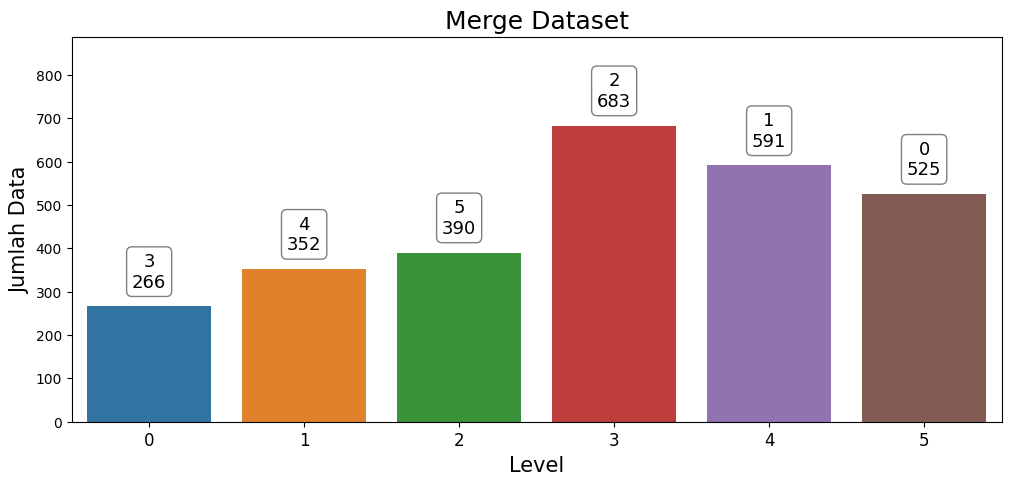

In [54]:
# Visualize merge dataset
vis_data_encode(df, "Merge Dataset")

In [55]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807 entries, 0 to 215
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        2807 non-null   float64
 1   1        2807 non-null   float64
 2   2        2807 non-null   float64
 3   3        2807 non-null   float64
 4   4        2807 non-null   float64
 5   5        2807 non-null   float64
 6   6        2807 non-null   float64
 7   7        2807 non-null   float64
 8   8        2807 non-null   float64
 9   9        2807 non-null   float64
 10  10       2807 non-null   float64
 11  11       2807 non-null   float64
 12  12       2807 non-null   float64
 13  13       2807 non-null   float64
 14  14       2807 non-null   float64
 15  15       2807 non-null   float64
 16  16       2807 non-null   float64
 17  17       2807 non-null   float64
 18  18       2807 non-null   float64
 19  19       2807 non-null   float64
 20  20       2807 non-null   float64
 21  21       2807 n

### Cutting dataset ❗️

#### No cut

In [ ]:
# Replace dataframe
dataset_all = df

#### Cut

In [56]:
# Define sample
sample_data = 266

In [57]:
# Get sample dataset
df_a1 = df[df[33]==0].sample(n=sample_data)
df_a2 = df[df[33]==1].sample(n=sample_data)
df_b1 = df[df[33]==2].sample(n=sample_data)
df_b2 = df[df[33]==3].sample(n=sample_data)
df_c1 = df[df[33]==4].sample(n=sample_data)
df_c2 = df[df[33]==5].sample(n=sample_data)

In [58]:
# Merging dataset
dataset_all = pd.concat([df_a1, df_a2, df_b1, df_b2, df_c1, df_c2])
dataset_all.head()

0           1          2          3          4          5  \
17  -368.61218  113.948814  20.031687   5.513115  -5.839737   3.457587   
4   -461.10574  144.004090  46.938763   5.219385   1.333126 -10.314607   
9   -346.55880  130.348140   6.882937 -12.951171  -7.038454  -1.610435   
152 -451.16156  116.498650  22.532835  39.237694  16.972704  10.692682   
124 -416.60345   76.559845  16.207130  14.431673  -0.165474   2.345349   

             6         7          8         9  ...        26        27  \
17  -16.641207 -5.019180   0.186427 -0.264305  ...  0.067650  3.704721   
4    -7.705100  0.765985 -22.047415 -8.293331  ... -5.906840 -8.295949   
9   -17.118830 -8.533148  -1.576350  7.602822  ... -4.349634 -2.047097   
152   0.431718 -2.278469  -5.169033  2.670159  ... -5.815038  0.626028   
124  -4.284705 -3.289852 -10.922576 -4.874582  ... -5.256589 -1.392274   

           28        29        30        31        32  33  \
17   3.344672  4.830344  0.025198  1.659416  0.086384   0   
4   -8.432599 -2.170331  0.024854  1.592309  0.057064   0   
9    1.359572  3.421433  0.032423  1.673649  0.087917   0   
152 -4.650491 -0.519502  0.008304  1.131781  0.044825   0   
124 -4.598074 -1.026613  0.005601  1.164071  0.161114   0   

                                                                                                     34  \
17         dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][39]-TRIM.mp3   
4    dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3   
9          dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][10]-TRIM.mp3   
152                            dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]6n51to7n00-TRIM.mp3   
124              dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]1n00to1n09-TRIM.mp3   

     isError  
17         1  
4          1  
9          1  
152        0  
124        0  

[5 rows x 36 columns]

### Check Dataset✅

In [59]:
# Display final dataset
dataset_all.head()

0           1          2          3          4          5  \
17  -368.61218  113.948814  20.031687   5.513115  -5.839737   3.457587   
4   -461.10574  144.004090  46.938763   5.219385   1.333126 -10.314607   
9   -346.55880  130.348140   6.882937 -12.951171  -7.038454  -1.610435   
152 -451.16156  116.498650  22.532835  39.237694  16.972704  10.692682   
124 -416.60345   76.559845  16.207130  14.431673  -0.165474   2.345349   

             6         7          8         9  ...        26        27  \
17  -16.641207 -5.019180   0.186427 -0.264305  ...  0.067650  3.704721   
4    -7.705100  0.765985 -22.047415 -8.293331  ... -5.906840 -8.295949   
9   -17.118830 -8.533148  -1.576350  7.602822  ... -4.349634 -2.047097   
152   0.431718 -2.278469  -5.169033  2.670159  ... -5.815038  0.626028   
124  -4.284705 -3.289852 -10.922576 -4.874582  ... -5.256589 -1.392274   

           28        29        30        31        32  33  \
17   3.344672  4.830344  0.025198  1.659416  0.086384   0   
4   -8.432599 -2.170331  0.024854  1.592309  0.057064   0   
9    1.359572  3.421433  0.032423  1.673649  0.087917   0   
152 -4.650491 -0.519502  0.008304  1.131781  0.044825   0   
124 -4.598074 -1.026613  0.005601  1.164071  0.161114   0   

                                                                                                     34  \
17         dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][39]-TRIM.mp3   
4    dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3   
9          dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][10]-TRIM.mp3   
152                            dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]6n51to7n00-TRIM.mp3   
124              dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]1n00to1n09-TRIM.mp3   

     isError  
17         1  
4          1  
9          1  
152        0  
124        0  

[5 rows x 36 columns]

In [60]:
# Display dataframe info
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 17 to 2127
Data columns (total 36 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        1596 non-null   float64
 1   1        1596 non-null   float64
 2   2        1596 non-null   float64
 3   3        1596 non-null   float64
 4   4        1596 non-null   float64
 5   5        1596 non-null   float64
 6   6        1596 non-null   float64
 7   7        1596 non-null   float64
 8   8        1596 non-null   float64
 9   9        1596 non-null   float64
 10  10       1596 non-null   float64
 11  11       1596 non-null   float64
 12  12       1596 non-null   float64
 13  13       1596 non-null   float64
 14  14       1596 non-null   float64
 15  15       1596 non-null   float64
 16  16       1596 non-null   float64
 17  17       1596 non-null   float64
 18  18       1596 non-null   float64
 19  19       1596 non-null   float64
 20  20       1596 non-null   float64
 21  21       1596

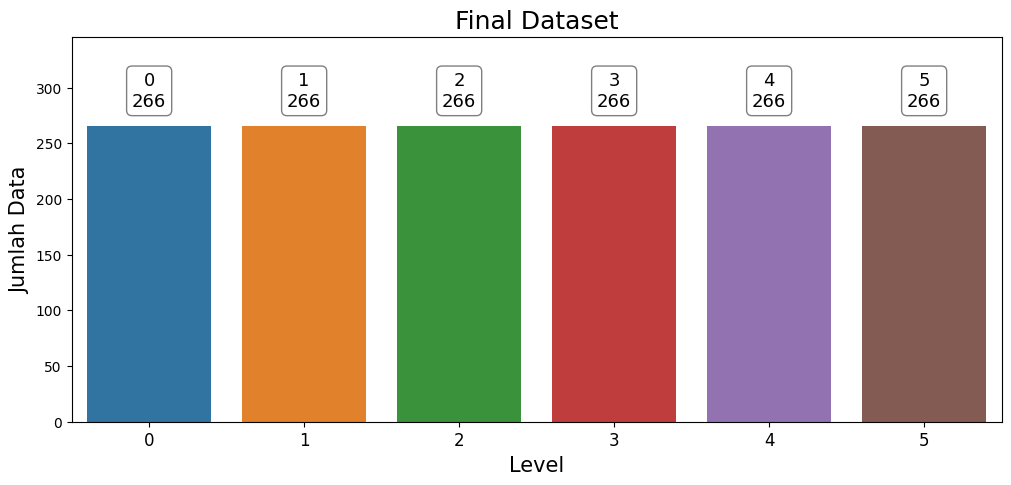

In [61]:
# Visualize merge dataset
vis_data_encode(dataset_all, "Final Dataset")

### One Hot Encoding Dataset ✅

In [62]:
# One hot encoding
df_category = pd.get_dummies(dataset_all[33])

In [63]:
# Display dataframe
df_category.tail()

0  1  2  3  4  5
2084  0  0  0  0  0  1
2096  0  0  0  0  0  1
2587  0  0  0  0  0  1
2421  0  0  0  0  0  1
2127  0  0  0  0  0  1

### Concate MFCC dataset and One Hot Encoding ✅

In [64]:
# Merge dataframe
new_df = pd.concat([dataset_all, df_category], axis=1)
new_df.head()

0           1          2          3          4          5  \
17  -368.61218  113.948814  20.031687   5.513115  -5.839737   3.457587   
4   -461.10574  144.004090  46.938763   5.219385   1.333126 -10.314607   
9   -346.55880  130.348140   6.882937 -12.951171  -7.038454  -1.610435   
152 -451.16156  116.498650  22.532835  39.237694  16.972704  10.692682   
124 -416.60345   76.559845  16.207130  14.431673  -0.165474   2.345349   

             6         7          8         9  ...        32  33  \
17  -16.641207 -5.019180   0.186427 -0.264305  ...  0.086384   0   
4    -7.705100  0.765985 -22.047415 -8.293331  ...  0.057064   0   
9   -17.118830 -8.533148  -1.576350  7.602822  ...  0.087917   0   
152   0.431718 -2.278469  -5.169033  2.670159  ...  0.044825   0   
124  -4.284705 -3.289852 -10.922576 -4.874582  ...  0.161114   0   

                                                                                                     34  \
17         dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][39]-TRIM.mp3   
4    dataset/Error/A1/IELTS Speaking Test Band score 3.5 with feedback [Zhw_o6sne2w]3n49to3n56-TRIM.mp3   
9          dataset/Error/A1/IELTS Speaking test band score 5.5 with feedback [JJsf2ukptLU][10]-TRIM.mp3   
152                            dataset/A1/IELTS Speaking Test Band 3.0 [OUXxohR7SmA]6n51to7n00-TRIM.mp3   
124              dataset/A1/IELTS Speaking Band 3 Sample with feedback [Jkp8eURNX3Q]1n00to1n09-TRIM.mp3   

     isError  0  1  2  3  4  5  
17         1  1  0  0  0  0  0  
4          1  1  0  0  0  0  0  
9          1  1  0  0  0  0  0  
152        0  1  0  0  0  0  0  
124        0  1  0  0  0  0  0  

[5 rows x 42 columns]

In [65]:
# Dispay dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 17 to 2127
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        1596 non-null   float64
 1   1        1596 non-null   float64
 2   2        1596 non-null   float64
 3   3        1596 non-null   float64
 4   4        1596 non-null   float64
 5   5        1596 non-null   float64
 6   6        1596 non-null   float64
 7   7        1596 non-null   float64
 8   8        1596 non-null   float64
 9   9        1596 non-null   float64
 10  10       1596 non-null   float64
 11  11       1596 non-null   float64
 12  12       1596 non-null   float64
 13  13       1596 non-null   float64
 14  14       1596 non-null   float64
 15  15       1596 non-null   float64
 16  16       1596 non-null   float64
 17  17       1596 non-null   float64
 18  18       1596 non-null   float64
 19  19       1596 non-null   float64
 20  20       1596 non-null   float64
 21  21       1596

### Prepare dataset to training ✅

In [66]:
# Get numpy dataset
dataset = new_df.values
dataset

array([[-368.61218, 113.948814, 20.031687, ..., 0, 0, 0],
       [-461.10574, 144.00409, 46.938763, ..., 0, 0, 0],
       [-346.5588, 130.34814, 6.882937, ..., 0, 0, 0],
       ...,
       [-345.03885, 86.71002, 10.3520565, ..., 0, 0, 1],
       [-264.18723, 107.10891, 21.082743, ..., 0, 0, 1],
       [-321.84592, 65.5386, 7.090109, ..., 0, 0, 1]], dtype=object)

In [67]:
# Define X variable
X = dataset[:,0:33]
X = np.asarray(X).astype(np.float64)
X

array([[-3.68612180e+02,  1.13948814e+02,  2.00316870e+01, ...,
         2.51980350e-02,  1.65941640e+00,  8.63842522e-02],
       [-4.61105740e+02,  1.44004090e+02,  4.69387630e+01, ...,
         2.48540470e-02,  1.59230920e+00,  5.70642332e-02],
       [-3.46558800e+02,  1.30348140e+02,  6.88293700e+00, ...,
         3.24232540e-02,  1.67364940e+00,  8.79166818e-02],
       ...,
       [-3.45038850e+02,  8.67100200e+01,  1.03520565e+01, ...,
         7.39053300e-02,  1.73251530e+00,  8.02038772e-02],
       [-2.64187230e+02,  1.07108910e+02,  2.10827430e+01, ...,
         5.89278230e-02,  1.72380070e+00,  8.96250603e-02],
       [-3.21845920e+02,  6.55386000e+01,  7.09010900e+00, ...,
         7.26548060e-02,  1.86014990e+00,  1.22663954e-01]])

In [68]:
# Define Y variable
y = dataset[:,36:42]
y = np.asarray(y).astype(np.int8)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=int8)

### Split dataset ✅

In [69]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Scalling dataset ✅

In [70]:
# Scalling
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Expand Dimension dataset ✅

In [71]:
# Expand X dimension
X_train_scal_ex = np.expand_dims(X_train, axis=1)
X_test_scal_ex = np.expand_dims(X_test, axis=1)

In [72]:
# Display size data
print("X_train shape:", X_train_scal_ex.shape)
print("X_test shape:", X_test_scal_ex.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1117, 1, 33)
X_test shape: (479, 1, 33)
y_train shape: (1117, 6)
y_test shape: (479, 6)


### Save to Drive ✅

In [73]:
# Save data real
!cp -r {COLAB_BASE_PATH + REAL_COUNT + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + REAL_CSV} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + A1_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + A2_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + B1_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + B2_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + C1_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + C2_SAMPLE} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + REAL_NUMPY_DATASET} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + FINAL_DATASET + PNG} {DRIVE_TARGET_PATH}

In [74]:
# Save data error
!cp -r {COLAB_BASE_PATH + ERROR_COUNT + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + ERROR_CSV} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + ERROR_NUMPY_DATASET} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + MERGE_DATASET + PNG} {DRIVE_TARGET_PATH}

## Training model 🆗

### Import library ✅

In [75]:
# Import library
import time
import datetime
import tensorflow as tf
import keras

### Build Model ✅

In [76]:
# Build Model RNN LSTM
print("Build LSTM RNN model ...")

model = keras.models.Sequential(name=MODEL_NAME)

model.add(keras.layers.LSTM(256, 
                            activation="relu", 
                            return_sequences=True, 
                            input_shape=X_train_scal_ex.shape[1:],
                            name="lstm_1_input"
                           ))

model.add(keras.layers.Dropout(0.2, 
                               name="dropout_1"
                              ))

model.add(keras.layers.LSTM(128, 
                            activation="relu", 
                            return_sequences=True, 
                            name="lstm_2"
                           ))

model.add(keras.layers.Dropout(0.2, 
                               name="dropout_2"
                              ))

model.add(keras.layers.LSTM(64, 
                            activation="relu", 
                            return_sequences=False, 
                            name="lstm_3"
                           ))

model.add(keras.layers.Dropout(0.2, 
                               name="dropout_3"
                              ))

model.add(keras.layers.Dense(6, 
                             activation="softmax", 
                             name="output"
                            ))
          
print("Compiling ...")

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

print("Success !!!")

Build LSTM RNN model ...


Compiling ...
Success !!!


In [77]:
# Add tensorboard callback
log_dir_pre = TENSORBOARD_LOG + "/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir_pre, 
    histogram_freq=1
)

In [78]:
# Display and save model summary
def myprint(s):
    with open(MODEL_SUMMARY, "a") as f:
        print(s, file=f)

model.summary(print_fn=myprint)
model.summary()

Model: "IELTS_Fluency_Model_Real_Error_Cut_Dataset"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1_input (LSTM)         (None, 1, 256)            296960    
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            197120    
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 output (Dense)         

### Training model ✅

In [79]:
# Training model
print("Start training...")
date_time_init = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_init+"\n")

time_training_init = time.time()

history = model.fit(X_train_scal_ex, 
                    y_train, 
                    batch_size=32, 
                    validation_split=0.2, 
                    epochs=100, 
                    shuffle=True,
                    callbacks=[tensorboard_callback],
                   )

time_training_end = time.time()
time_training = time_training_init - time_training_end

print("\nEnd training...")
date_time_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_end+"\n")

print("Training time:")
timer(time_training_init, time_training_end)

Start training...
2023-06-03 at 11:44:44 UTC

Epoch 1/100
28/28 [==============================] - 10s 42ms/step - loss: 1.7831 - accuracy: 0.2161 - val_loss: 1.6798 - val_accuracy: 0.2723
Epoch 2/100
28/28 [==============================] - 0s 17ms/step - loss: 1.6683 - accuracy: 0.2788 - val_loss: 1.5595 - val_accuracy: 0.3884
Epoch 3/100
28/28 [==============================] - 0s 17ms/step - loss: 1.5316 - accuracy: 0.3415 - val_loss: 1.4405 - val_accuracy: 0.4196
Epoch 4/100
28/28 [==============================] - 1s 18ms/step - loss: 1.4189 - accuracy: 0.4132 - val_loss: 1.2714 - val_accuracy: 0.5268
Epoch 5/100
28/28 [==============================] - 0s 17ms/step - loss: 1.2882 - accuracy: 0.4804 - val_loss: 1.1627 - val_accuracy: 0.5446
Epoch 6/100
28/28 [==============================] - 0s 17ms/step - loss: 1.1301 - accuracy: 0.5599 - val_loss: 0.9153 - val_accuracy: 0.7054
Epoch 7/100
28/28 [==============================] - 0s 17ms/step - loss: 1.0542 - accuracy: 0.5969 -

## Evaluate and Predict 🆗

### Install and import library ✅

In [80]:
#@title Install library
%%capture
!pip install pydub
!pip install scikit-plot

In [81]:
# Import library
import io
import pydub
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics
from urllib.request import urlopen

### Evaluate model ✅

In [82]:
# Evaluate
print("Evaluate ...")
eval_loss, eval_accuracy = model.evaluate(X_test_scal_ex, y_test, batch_size=32, verbose=1)

print("Evaluation Loss:", eval_loss)
print("Evaluation Accuracy:", eval_accuracy)

Evaluate ...
15/15 [==============================] - 1s 4ms/step - loss: 0.9318 - accuracy: 0.8768
Evaluation Loss: 0.9317959547042847
Evaluation Accuracy: 0.8768267035484314


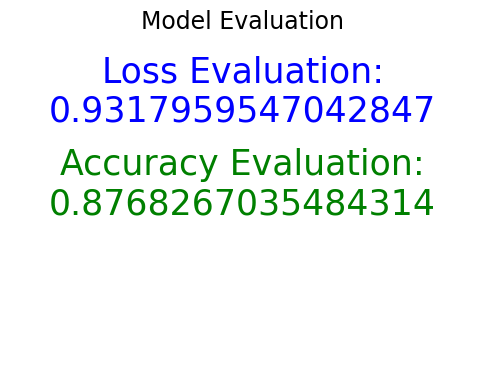

In [83]:
# Display evaluation
fig, ax = plt.subplots(figsize=(6, 4))

ax.text(0.5, 1, f"Loss Evaluation:\n{eval_loss}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="blue", fontsize=25)

ax.text(0.5, 0.7, f"Accuracy Evaluation:\n{eval_accuracy}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="green", fontsize=25)

plt.title(label="Model Evaluation", fontsize=17, pad=19)
plt.axis("off")

# Save data in image
plt.savefig(MODEL_EVALUATION_PNG, dpi=300.0, transparent=True)

### Predict test dataset ✅

In [84]:
# Value for predict
print(y_test[17:18])
print(X_test_scal_ex[17:18])
print(X_test_scal_ex[17:18].shape)
print(type(X_test_scal_ex[17:18]))

[[0 1 0 0 0 0]]
[[[-3.24805570e+02  9.65636000e+01  2.25228140e+01  2.70160240e+01
    9.59743800e+00  2.82545260e+00 -6.85746530e+00 -5.73886400e-01
   -8.20454300e+00  2.09852650e+00 -3.64280750e+00 -5.15927030e+00
   -5.18664900e+00 -8.87256860e-01 -3.97421240e+00 -1.91955500e+00
   -7.54071430e+00  1.12191870e+00 -4.91582440e+00 -5.26758000e+00
   -4.30503030e+00 -1.44173780e+00 -6.32914500e+00 -2.62868500e+00
   -2.66188670e+00 -1.73753610e+00 -2.71671560e+00 -1.05901500e-01
   -2.45642000e+00  5.46778700e-02  3.80858260e-02  1.57148020e+00
    1.33357394e-01]]]
(1, 1, 33)
<class 'numpy.ndarray'>


In [85]:
# Predict
pred = model.predict(X_test_scal_ex[17:18])
print("Prediction probability:", pred)

tar = np.argmax(y_test[17:18], axis=1)
print("Target class:", tar)

classes = np.argmax(pred, axis=1)
print("Predict class:", classes)

1/1 [==============================] - 1s 873ms/step
Prediction probability: [[3.7455060e-02 9.6150810e-01 8.5240835e-04 1.5077357e-04 2.4031464e-05
  9.6823769e-06]]
Target class: [1]
Predict class: [1]


### Predict real data ✅

#### Colab ✅

In [86]:
# Path data real
path_data = "/content/drive/MyDrive/Final Project/Machine Learning/Fluency/Test audio/Telkom-University-4.wav"

In [87]:
# Get data
mfccs, rmse, spectral_flux, zcr = feature_extraction(path_data)

#### Next step ✅

In [88]:
# Make array
number_of_features = 3 + 30
datasetcheck = np.empty((0, number_of_features))

In [89]:
# Data to array
extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr])
datasetcheck = np.vstack([datasetcheck, extracted_features])

In [90]:
# Expand dimension
datasetcheck = np.expand_dims(datasetcheck, axis=1)

In [91]:
# Predict
pred = model.predict(datasetcheck)
print("Prediction probability:", pred)

classes = np.argmax(pred, axis=1)
print("Predict class:", classes)

1/1 [==============================] - 0s 31ms/step
Prediction probability: [[2.1105277e-06 1.2766388e-02 1.7274700e-02 2.0866879e-11 9.6994287e-01
  1.3991832e-05]]
Predict class: [4]


### Get training data ✅

In [92]:
# Predict testing dataset
y_predict = model.predict(X_test_scal_ex)

15/15 [==============================] - 0s 2ms/step


In [93]:
# Get Y value predict
y_test_arg = np.argmax(y_test, axis=1)
y_predict = np.argmax(y_predict, axis=1)

In [94]:
# Save history training
history_train = pd.DataFrame(history.history)

In [95]:
# Get loss information
epoch_train_loss = int(history_train[history_train["loss"] == history_train["loss"].min()].index.values[0])
epoch_val_loss = int(history_train[history_train["val_loss"] == history_train["val_loss"].min()].index.values[0])
train_loss_min = float("{:0.4f}".format(history_train["loss"].min()))
val_loss_min = float("{:0.4f}".format(history_train["val_loss"].min()))

In [96]:
# Get accuracy information
epoch_train_accuracy = int(history_train[history_train["accuracy"] == history_train["accuracy"].max()].index.values[0])
epoch_val_accuracy = int(history_train[history_train["val_accuracy"] == history_train["val_accuracy"].max()].index.values[0])
train_accuracy_max = float("{:0.4f}".format(history_train["accuracy"].max()))
val_accuracy_max = float("{:0.4f}".format(history_train["val_accuracy"].max()))

### Visualize training process ✅

Min Train Loss: 0.1371
Min Validation Loss: 0.4455


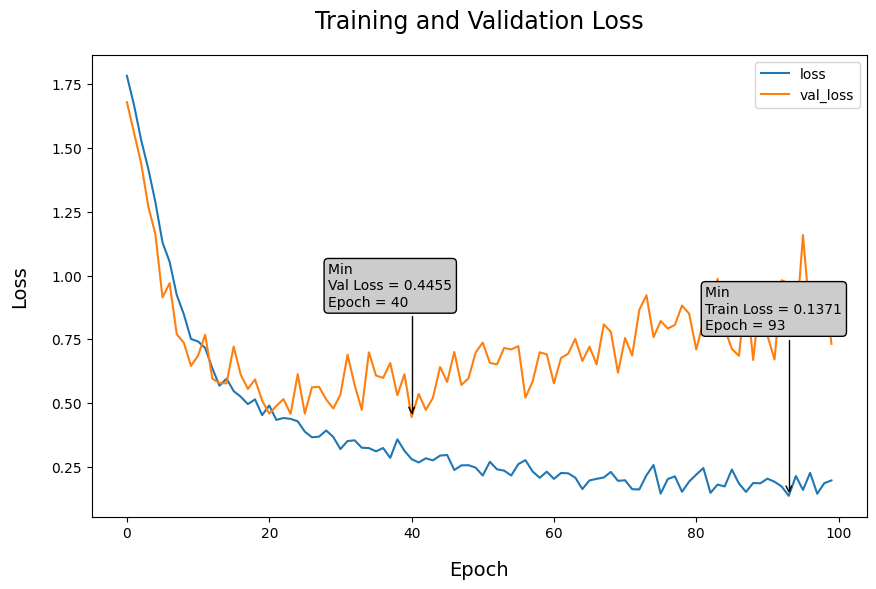

In [97]:
# Ploting loss training dan validation
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history_train.loc[:, ["loss", "val_loss"]])
ax.legend(labels=["loss", "val_loss"])

ax.annotate(
    f"Min \nTrain Loss = {train_loss_min}\nEpoch = {epoch_train_loss}",
    xy=(epoch_train_loss, train_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Min \nVal Loss = {val_loss_min}\nEpoch = {epoch_val_loss}",
    xy=(epoch_val_loss, val_loss_min), xycoords="data",
    xytext=(-60, 80), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.title(label="Training and Validation Loss", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Loss", labelpad=16, fontsize=14)

print("Min Train Loss:", train_loss_min)
print("Min Validation Loss:", val_loss_min)

# Save picture
plt.savefig(LOSS_EVALUATION_PNG, dpi=300.0, transparent=True)

Max Train Accuracy: 0.9518
Max Validation Accuracy: 0.9241


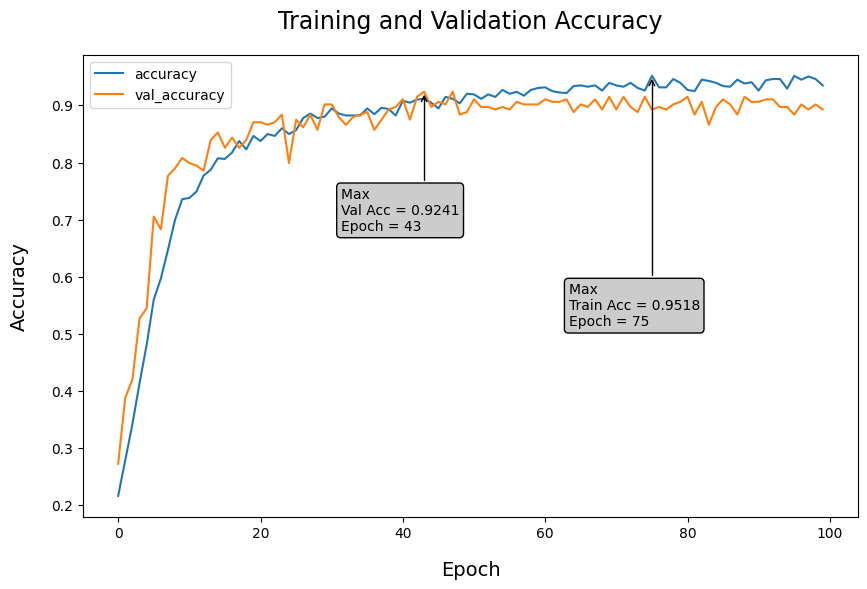

In [98]:
# Ploting accuracy training dan validation
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history_train.loc[:, ["accuracy", "val_accuracy"]])
ax.legend(labels=["accuracy", "val_accuracy"])

ax.annotate(
    f"Max \nTrain Acc = {train_accuracy_max}\nEpoch = {epoch_train_accuracy}",
    xy=(epoch_train_accuracy, train_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Max \nVal Acc = {val_accuracy_max}\nEpoch = {epoch_val_accuracy}",
    xy=(epoch_val_accuracy, val_accuracy_max), xycoords="data",
    xytext=(-60, -100), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.title(label="Training and Validation Accuracy", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Accuracy", labelpad=16, fontsize=14)

print("Max Train Accuracy:", train_accuracy_max)
print("Max Validation Accuracy:", val_accuracy_max)

# Save picture
plt.savefig(ACCURACY_EVALUATION_PNG, dpi=300.0, transparent=True)

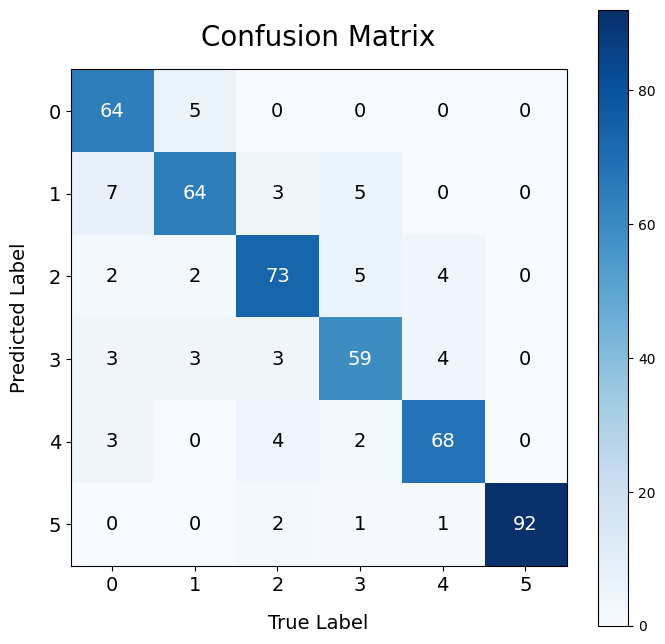

In [99]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_predict,
                                    y_test_arg,
                                    figsize=(8, 8),
                                    text_fontsize=14,
                                   )

plt.title(label="Confusion Matrix", fontsize=20, pad=17)
plt.ylabel("Predicted Label", labelpad=14)
plt.xlabel("True Label", labelpad=14)

# Save picture
plt.savefig(CM_EVALUATION_PNG, dpi=300.0, transparent=True)

In [100]:
# Print classification report
print(metrics.classification_report(y_predict, y_test_arg, digits=3))

              precision    recall  f1-score   support

           0      0.810     0.928     0.865        69
           1      0.865     0.810     0.837        79
           2      0.859     0.849     0.854        86
           3      0.819     0.819     0.819        72
           4      0.883     0.883     0.883        77
           5      1.000     0.958     0.979        96

    accuracy                          0.877       479
   macro avg      0.873     0.875     0.873       479
weighted avg      0.879     0.877     0.877       479



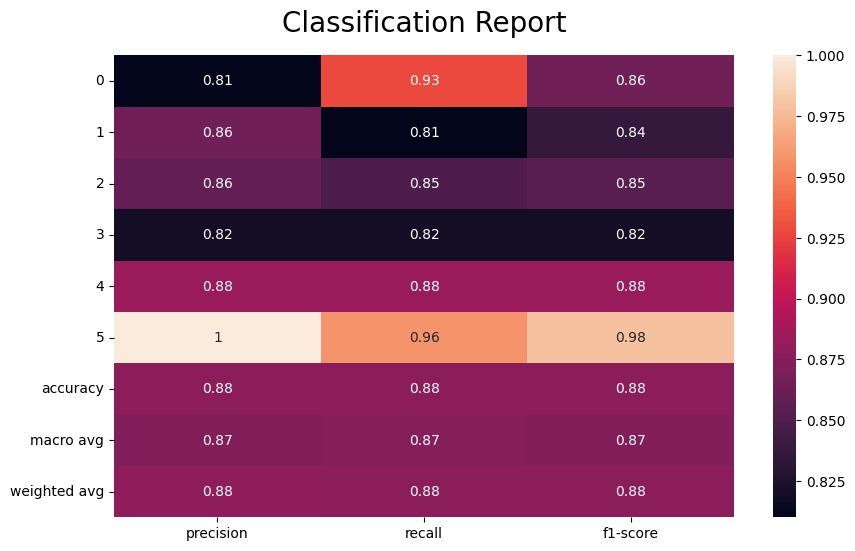

In [101]:
# Display and save classification report 
fig, ax = plt.subplots(figsize=(10, 6))

clf_report = metrics.classification_report(y_predict,
                                           y_test_arg,
                                           output_dict=True)

classification_report = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, ax=ax, annot=True)

classification_report.set_title("Classification Report", fontsize=20, pad=17)

fig = classification_report.get_figure()

fig.savefig(CR_EVALUATION_PNG, dpi=300.0, transparent=True) 

In [102]:
# Define timer
def display_timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds

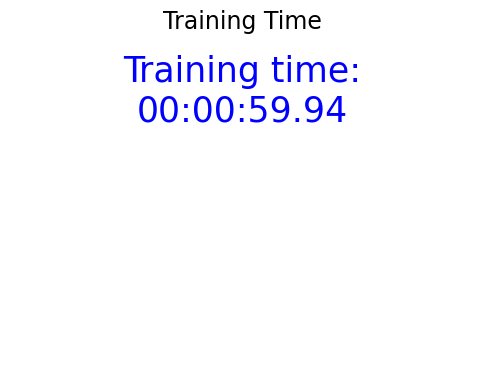

In [103]:
# Display training time
fig, ax = plt.subplots(figsize=(6, 4))

hours_train, minutes_train, seconds_train = display_timer(time_training_init, time_training_end)

ax.text(0.5, 1, "Training time:\n{:0>2}:{:0>2}:{:05.2f}".format(int(hours_train), int(minutes_train), seconds_train),
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="blue", fontsize=25)

plt.title(label="Training Time", fontsize=17, pad=19)
plt.axis("off")

# Save data in image
plt.savefig(TRAINING_TIME_PNG, dpi=300.0, transparent=True)

### Save to Drive ✅

In [104]:
# Save training process
!cp -r {COLAB_BASE_PATH + MODEL_SUMMARY} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + MODEL_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + LOSS_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + ACCURACY_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CM_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CR_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + TRAINING_TIME + PNG} {DRIVE_TARGET_PATH}

## Save model 🆗

### Save model h5 ✅

In [105]:
# Save model h5
model.save(H5_MODEL_NAME)

### Save model folder ✅

In [106]:
# Save model
model.save(FOLDER_MODEL_NAME)

In [107]:
# Bundle file
!tar -cvf {FOLDER_MODEL_NAME + ".tar.gz"} {FOLDER_MODEL_NAME + "/"}

ielts_fluency_model/
ielts_fluency_model/keras_metadata.pb
ielts_fluency_model/fingerprint.pb
ielts_fluency_model/variables/
ielts_fluency_model/variables/variables.data-00000-of-00001
ielts_fluency_model/variables/variables.index
ielts_fluency_model/assets/
ielts_fluency_model/saved_model.pb


### Save to Drive ✅

In [108]:
# Save model
!cp -r {COLAB_BASE_PATH + FOLDER_MODEL_NAME + ".tar.gz"} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + H5_MODEL_NAME} {DRIVE_TARGET_PATH}

## Tensorboard 🆗

In [109]:
# Save training to tensorboard
!tensorboard dev upload --logdir ./{TENSORBOARD_LOG} \
  --name {TITLE} \
  --description {DESCRIPTION} \
  --one_shot

2023-06-03 11:48:07.988867: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs-training

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) y

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   ZCD-HXR-LBK



New experiment created. View your TensorBoard at: https://tensorboard.dev/experi

## Load model 🆗

### Import library ✅

In [110]:
# Import library
import io
import librosa
import pydub
import numpy as np
from urllib.request import urlopen
from keras.models import load_model

### Define function and variable ✅

In [111]:
# Define variable
model_path = H5_MODEL_NAME
audio_wav = "/content/drive/MyDrive/Final Project/Machine Learning/Fluency/Test audio/Citeureup 2.wav"

In [112]:
# Define feature extraction
def feature_extraction_predict(file_name):
    http_prefix = "https://"

    if file_name != None and http_prefix in file_name:
        wav = io.BytesIO()

        with urlopen(file_name) as r:
            r.seek = lambda *args: None
            pydub.AudioSegment.from_file(r).export(wav, "wav")

        wav.seek(0)
    else:
        wav = file_name

    X , sample_rate = librosa.load(wav)

    if X.ndim > 1:
        X = X[:, 0]
    X = X.T
            
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_mfcc).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=X).T, axis=0)
    spectral_flux = np.mean(librosa.onset.onset_strength(y=X, sr=sample_rate).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0)

    return mfccs, rmse, spectral_flux, zcr

In [113]:
# Function to predict
def fluency(model_path, wav):
    model = load_model(model_path)

    mfccs, rmse, spectral_flux, zcr = feature_extraction_predict(wav)

    number_of_features = 3 + 30
    audio = np.empty((0, number_of_features))

    extracted_features = np.hstack([mfccs, rmse, spectral_flux, zcr])
    audio = np.vstack([audio, extracted_features])

    audio = np.expand_dims(audio, axis=1)

    pred = model.predict(audio)
    classes = np.argmax(pred, axis=1)

    if classes[0] == 0:
        return 3
    elif classes[0] == 2:
        return 4
    elif classes[0] == 2:
        return 5
    elif classes[0] == 3:
        return 6.5
    elif classes[0] == 4:
        return 8
    elif classes[0] == 5:
        return 9
    else:
        return 0

### Band predict ✅

In [114]:
# Band predict
predict_band = fluency(model_path, audio_wav)
print("Fluency band is", predict_band)

1/1 [==============================] - 0s 382ms/step
Fluency band is 9
